In [17]:
import pyaccel
import pymodels
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scyint
import pandas as pd
from mathphys import constants
from mathphys.functions import save_pickle, load_pickle
from mathphys.beam_optics import beam_rigidity

In [2]:
import touschek_pack.functions as tousfunc

In [3]:
import touschek_pack.Classes as tousclass

In [4]:
from itertools import groupby

In [5]:
# This function will probably will be in my repositories
# I dont know if I will use it again, but it seems to me that it could be uselfull in some point

def extract_delt(groups, deltas):
    c = 0
    big_list = []
    for lists in groups:
        lil_list = []
        for _ in lists:
            lil_list.append(c)
            c+=1
            
        big_list.append(lil_list)
    
    sep_deltas = []
    comp_l = []

    for iten in big_list:
        sep_deltas.append(deltas[iten])
        comp_l.append(len(iten))


    return sep_deltas, comp_l

In [6]:
acc = pymodels.si.create_accelerator()
acc = pymodels.si.fitted_models.vertical_dispersion_and_coupling(acc)


tousan = tousclass.Tous_analysis(acc)

In [7]:
spos = pyaccel.lattice.find_spos(acc, indices='open')

s = [spos[1046]]

res, fp, dp = tousan.fast_aquisition(s, 'pos')

In [ ]:
acc = pymodels.si.create_accelerator()
acc = pymodels.si.fitted_models.vertical_dispersion_and_coupling(acc)

tousan = tousclass.Tous_analysis(acc)

In [ ]:
# lembre-se que queremos contruir uma função que transforme dados que eu já possuo em tabelas
# uma biblioteca bastante util para isso seria a bib pandas
# vamos tentar usar ela para nossos calculos

s = [spos[1046]]

ress = tousan.fast_aquisition(s, 'pos')

In [ ]:
res, fp, dp = ress

In [8]:
# para este caso específico a posição analisada é spos[1046], ou seja, o indice em que a simulação tracking começa é em 1046
# a para este valor teremos então diversas posições em que o eletron é perdido e a partir disso eu vou ter organizar meu pensamento

lostinds, deltas = np.zeros(len(res)), np.zeros(len(res))
for idx,iten in enumerate(res):
    tloss, ellost, delta = iten
    lostinds[idx] = ellost
    deltas[idx] = delta # alguns elétrons possuem desvio de energia abaixo da aceitancia e acabam não sendo perdidos

lostinds = np.intp(lostinds)

# deltas são os desvios de energia perdidos pelo tracking


In [9]:
data = pd.DataFrame({'lost_pos_by_tracking': lostinds}) # create the dataframe that is obtained by tracking
lost_pos_column = (data.groupby('lost_pos_by_tracking').groups).keys()
data = pd.DataFrame({'lost_pos_by_tracking':lost_pos_column}) # this step agroups the lost_positions

fact = 0.03
step = int((deltas[0]+deltas[-1])/fact)
itv_track = np.linspace(deltas[0], deltas[-1], step) # method learned by fac repositories


itv_delta = []
for current, next_iten in zip(itv_track, itv_track[1:]):
    data['{:.2f} % < delta < {:.2f} %'.format(current*1e2, next_iten*1e2)] = np.zeros(len(list(lost_pos_column))) # this step creates new columns in the dataframe and fill with zeros
    itv_delta.append((current, next_iten))
    # Next step must calculate each matrix element from the dataframe

var = list(data.index) 
# quando as duas variáveis são iguais isso acab resultando em um erro então estou colocando essa condição.
if var == lost_pos_column:
    pass
else:
    data = data.set_index('lost_pos_by_tracking')

for idx, lost_idx in enumerate(lostinds): # essas duas estruturas de repetição são responsáveis por calcular 
    # o percentual dos eletrons que possuem um determinado desvio de energia e se perdem em um intervalo de desvio de energia específico
    delta = deltas[idx]
    for j, interval in enumerate(itv_delta):
        if j == 0:
            if interval[0]<= delta <= interval[1]:
                data.loc[lost_idx, '{:.2f} % < delta < {:.2f} %'.format(interval[0]*1e2, interval[1]*1e2)] += 1
        else:
            if interval[0]< delta <= interval[1]:
                data.loc[lost_idx, '{:.2f} % < delta < {:.2f} %'.format(interval[0]*1e2, interval[1]*1e2)] += 1

data = data / len(deltas)

In [36]:
if data.values.sum() == 1:
    pass
else:
    data = data/len(deltas)

In [37]:
data

,2.91 % < delta < 5.38 %,5.38 % < delta < 7.86 %,7.86 % < delta < 10.33 %,10.33 % < delta < 12.80 %,12.80 % < delta < 15.27 %
lost_pos_by_tracking,,,,,
1109,0.000000,0.000000,0.000000,0.000000,0.148148
1110,0.000000,0.000000,0.000000,0.129630,0.052469
1111,0.000000,0.000000,0.027778,0.070988,0.000000
1112,0.000000,0.000000,0.040123,0.000000,0.000000
1113,0.000000,0.000000,0.006173,0.000000,0.000000
1234,0.000000,0.000000,0.083333,0.000000,0.000000
1235,0.000000,0.055556,0.040123,0.000000,0.000000
1236,0.000000,0.040123,0.000000,0.000000,0.000000
1293,0.003086,0.000000,0.000000,0.000000,0.000000


In [18]:
cov = pyaccel.optics.beam_envelope.calc_beamenvelope(acc)
radius = constants.electron_radius
light_sp = constants.light_speed
Np = 50000
beta = beam_rigidity(energy=3)[2]
g_fact = 1/np.sqrt(1-beta**2)


In [56]:
tous_scatt_pos = radius**2 * light_sp * Np
tous_scatt_pos *= 1/8 /np.pi / g_fact**2


twi,*_ = pyaccel.optics.calc_twiss(acc, indices='closed')
etax = twi.etax
etay = twi.etay

ltime = pyaccel.lifetime.Lifetime(acc)
fintp = ltime.touschek_data['touschek_coeffs']['f_int_p']
fintp = fintp.squeeze()

spos =  pyaccel.lattice.find_spos(acc, indices='closed')
accep = pyaccel.optics.calc_touschek_energy_acceptance(acc)
scalc, daccp, daccn = tousfunc.get_scaccep(acc, accep)


tous_scatt_rate_s = []
for idx,iten in enumerate(cov):
    
    index = np.argmin(np.abs(scalc-spos[idx]))
    diag = np.diag(cov[idx])
    sig_x, sig_y, sig_p, sig_z = diag[0], diag[2], diag[4], diag[5]
    sqt = np.sqrt(sig_x**2 * sig_y**2 - sig_p**4 * etax**2 * etay**2)
    taum  = beta**2 * daccp[index]**2
    tous_scatt_pos *= 1/ sig_z / sqt / taum
    tous_scatt_pos *= fintp[index]
    tous_scatt_rate_s.append(tous_scatt_pos)

/tmp/ipykernel_577/1790557644.py:26: RuntimeWarning: overflow encountered in scalar multiply
  tous_scatt_pos *= 1/ sig_z / taum


In [61]:
taum

0.0019122327972218634

In [ ]:
accep = pyaccel.optics.calc_touschek_energy_acceptance(acc)

scalc, daccp, daccn = tousfunc.get_scaccep(acc, accep)

In [ ]:
b1 = ltime.touschek_data['touschek_coeffs']['b1']
b2 = ltime.touschek_data['touschek_coeffs']['b2']



In [ ]:
touschek_scattering_rate = []
# for idx,iten in enumerate(daccp):
#     touschek_scattering_rate.append(ltime.f_integral_simps(iten, b1[idx], b2[idx]))


In [ ]:
test_acceptance = np.array([daccp[1],daccp[2], daccp[3]])



In [ ]:
def f_function_arg(kappa, kappam, b1_, b2_):

    tau = (np.tan(kappa)**2)[:, None]
    taum = (np.tan(kappam)**2)[None, :]
    ratio = tau/taum/(1+tau)
    return ratio, tau, taum


In [ ]:
import scipy.special as special

In [ ]:
def f_function_arg_or(kappa, kappam, b1_, b2_):

    tau = (np.tan(kappa)**2)[:, None]
    taum = (np.tan(kappam)**2)[None, :]
    ratio = tau/taum/(1+tau)
    arg = (2*tau+1)**2 * (ratio - 1)/tau
    arg += tau - np.sqrt(tau*taum*(1+tau))
    arg -= (2+1/(2*tau))*np.log(ratio)
    arg *= np.sqrt(1+tau)
    bessel = np.exp(-(b1_-b2_)*tau)*special.i0e(b2_*tau)
    return arg * bessel

In [ ]:
npts = 300
kappa = np.linspace(daccp, np.pi/2, npts+1)

var = f_function_arg_or(kappa, daccp,b1,b2)


In [ ]:
tau.squeeze().transpose()

In [ ]:
matrix = np.array([[1,2,3],
                   [0,2,3],
                   [1,2,3]])
matrix.shape

matrix[1,0]



In [ ]:
tau.squeeze().shape

In [ ]:
plt.plot(dp,fp)

In [28]:
tousan.get_amps_idxs()

(True,
 (array([-0.04372908, -0.04372908, -0.04372908, ..., -0.04372908,
         -0.04372908, -0.04372908]),
  array([0.04372908, 0.04372908, 0.04372908, ..., 0.04372908, 0.04372908,
         0.04372908])),
 (array([0.00000000e+00, 1.00036646e-01, 2.00073292e-01, ...,
         5.18189827e+02, 5.18289863e+02, 5.18389900e+02]),
  array([0.04372908, 0.04372908, 0.04372908, ..., 0.04372908, 0.04372908,
         0.04372908]),
  array([-0.04372908, -0.04372908, -0.04372908, ..., -0.04372908,
         -0.04372908, -0.04372908])))

In [ ]:
accep = pyaccel.optics.calc_touschek_energy_acceptance(acc)

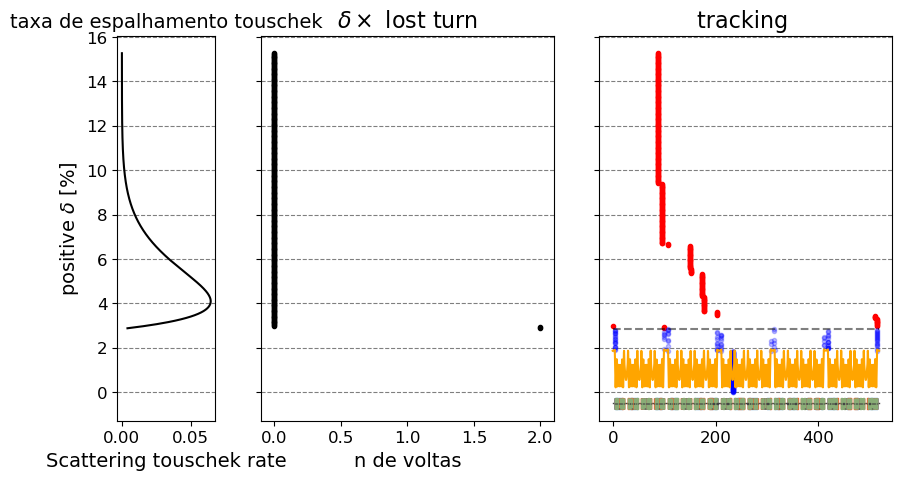

/home/thaleseqb/repos/pack_thales/thales_pack/touschek_pack/functions.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [29]:
tousan.plot_analysis_at_position([spos[1046]], 'pos', accep)